# Load processed training data

In [2]:
import pandas as pd
import seaborn as sns

In [151]:
training_df = pd.read_pickle("../data/io/full_train_df")

In [152]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158656 entries, 0 to 0
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   start_date    158656 non-null  object        
 1   end_date      158656 non-null  object        
 2   time_control  158656 non-null  object        
 3   white         158656 non-null  object        
 4   black         158656 non-null  object        
 5   date          158656 non-null  datetime64[ns]
 6   result        158656 non-null  float64       
 7   id            158656 non-null  object        
 8   game_year     158656 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 12.1+ MB


We have a total of 158656 games from all the 800 tournaments and no null values.

In [153]:
training_df.head()

,start_date,end_date,time_control,white,black,date,result,id,game_year
0,2014-01-08,2014-01-17,rapid,Jia Xiezhen,Fan Chenni,2014-01-08,0.5,tournament_1_1,2014
0,2014-01-08,2014-01-17,rapid,Lu Yaguang,Li Jiajue,2014-01-08,0.5,tournament_1_2,2014
0,2014-01-08,2014-01-17,rapid,Liu Qixi,Liu Xiaopeng,2014-01-08,0.5,tournament_1_3,2014
0,2014-01-08,2014-01-17,rapid,Lu Guijie,Zheng Xincong,2014-01-08,1.0,tournament_1_4,2014
0,2014-01-08,2014-01-17,rapid,Li Wenling,Xie Tianying,2014-01-08,0.5,tournament_1_5,2014


# Formatting

In [154]:
training_df['start_date'] = pd.to_datetime(training_df['start_date'], format='%Y-%m-%d')
training_df['end_date'] = pd.to_datetime(training_df['end_date'], format='%Y-%m-%d')
training_df['date'] = pd.to_datetime(training_df['date'], format='%Y-%m-%d')

In [155]:
training_df.rename(columns={'date': 'game_date'}, inplace=True)

Sort the rows by date.

In [156]:
training_df= training_df.sort_values(by='game_date')

In [157]:
min(training_df.game_date)

Timestamp('2014-01-08 00:00:00')

In [158]:
max(training_df.game_date)

Timestamp('2020-01-05 00:00:00')

Training data goes from January 2014 to January 2020.

Keeping the game date and removing the other dates.

In [159]:
training_df.drop(['start_date', 'end_date'], inplace=True, axis=1)

In [160]:
training_df.tail()

,time_control,white,black,game_date,result,id,game_year
0,rapid,Li Huahong,Chen Sigang,2020-01-05,0.5,tournament_800_171,2020
0,rapid,Hu Qihong,Lin Hongli,2020-01-05,0.5,tournament_800_170,2020
0,rapid,Wang Jianmin,Liu Yaosheng,2020-01-05,0.0,tournament_800_169,2020
0,rapid,Lai Zhenen,Mao Xinlei,2020-01-05,0.5,tournament_800_180,2020
0,rapid,Jiang Ying,Liang Qing,2020-01-05,0.5,tournament_800_175,2020


# Analyzing games and results by year and game type

In chess, the player with the white pieces gets to move first and therefore has a slight advantage. Let's analyze by year and by type of tournament.

In [161]:
training_df['game_year'] = training_df['game_date'].dt.year

In [162]:
def get_winner(x):
    if x == 1.0:
        return 'white'
    if x == 0.0:
        return 'black'
    return 'draw'
training_df['winner'] = training_df['result'].apply(lambda x: get_winner(x))

In [163]:
training_df.tail()

,time_control,white,black,game_date,result,id,game_year,winner
0,rapid,Li Huahong,Chen Sigang,2020-01-05,0.5,tournament_800_171,2020,draw
0,rapid,Hu Qihong,Lin Hongli,2020-01-05,0.5,tournament_800_170,2020,draw
0,rapid,Wang Jianmin,Liu Yaosheng,2020-01-05,0.0,tournament_800_169,2020,black
0,rapid,Lai Zhenen,Mao Xinlei,2020-01-05,0.5,tournament_800_180,2020,draw
0,rapid,Jiang Ying,Liang Qing,2020-01-05,0.5,tournament_800_175,2020,draw


In [164]:
game_stats = training_df[['game_year','time_control']].groupby(by=['game_year', 'time_control']).time_control.agg(['count'])
game_stats

count
game_year time_control       
2014      classic       10959
          rapid         17054
2015      classic       10183
          rapid         15588
2016      classic        9955
          rapid         15390
2017      classic       10316
          rapid         15706
2018      classic       13590
          rapid         14865
2019      classic        9929
          rapid         15016
2020      rapid           105

In [165]:
training_df.time_control.value_counts(normalize=True)

rapid      0.590737
classic    0.409263
Name: time_control, dtype: float64

There are more rapid games than classic games: almost 60% of the games are rapid.

In [166]:
winner_stats = training_df[['game_year','time_control', 'winner']].groupby(by=['game_year', 'time_control','winner']).winner.agg(['count'])
winner_stats

count
game_year time_control winner       
2014      classic      black    2098
                       draw     5388
                       white    3473
          rapid        black    4130
                       draw     7025
                       white    5899
2015      classic      black    2194
                       draw     4554
                       white    3435
          rapid        black    4104
                       draw     5847
                       white    5637
2016      classic      black    2201
                       draw     4515
                       white    3239
          rapid        black    4271
                       draw     5457
                       white    5662
2017      classic      black    2479
                       draw     4331
                       white    3506
          rapid        black    4578
                       draw     5263
                       white    5865
2018      classic      black    3304
                       draw     5696
                       white    4590
          rapid        black    4478
                       draw     4739
                       white    5648
2019      classic      black    2374
                       draw     4148
                       white    3407
          rapid        black    4635
                       draw     4581
                       white    5800
2020      rapid        black      33
                       draw       35
                       white      37

In most of the cases the most frequent result is 'draw', however we notice the slightly higher number of cases where the 'white' player wins. In particular for rapid games this advantage is more notorious probably because of the shorter duration of the game.

We can show visually this in the following graph.

In [167]:
winner_stats = winner_stats.reset_index()

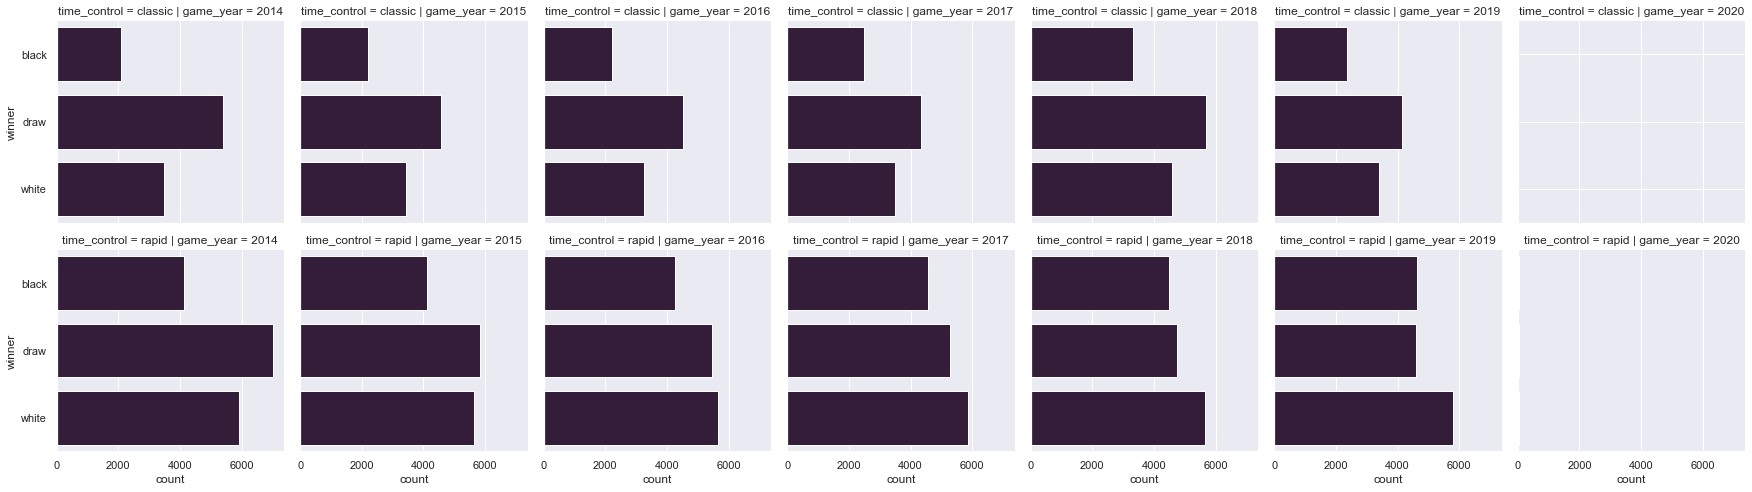

In [168]:
g = sns.FacetGrid(winner_stats, col="game_year",  row="time_control", height=3.5)
g.map_dataframe(sns.barplot, x="count", y='winner')

The first row is for the classic games and the second row for the rapid games, where we can identify, specially for more recent years that white players tend to win more often.

Finally the overall stats are:

In [169]:
training_df.winner.value_counts()

draw     61579
white    56198
black    40879
Name: winner, dtype: int64

In percentages: 38.81% draw, 35.42% white and 25.76% black. Let's compare for each type of game.

In [170]:
training_df.loc[training_df['time_control']=='classic'].winner.value_counts()

draw     28632
white    21650
black    14650
Name: winner, dtype: int64

From a total of 64932 classic games: 44.09% draw, 33.34% white and 22.56% black.

In [171]:
training_df.loc[training_df['time_control']=='rapid'].winner.value_counts()

white    34548
draw     32947
black    26229
Name: winner, dtype: int64

From a total of 93724 rapic games: 36.86% white, 35.15% draw and 27.98% black.

## Defining draw probability ranges based on the winning probability of a player
Based on these percentages we are going to propose these draw probability ranges when predicting the result of a game:


Draw probability range of a player for classic:
[0.40, 0.65]

Draw probability range of a player  for rapid:
[0.45, 0.55]

## Analyzing players

In [172]:
training_df['white'] = training_df['white'].astype("category")
training_df['black'] = training_df['black'].astype("category")

In [173]:
training_df['white'].describe()

count        158656
unique          562
top       Zhang Yan
freq            949
Name: white, dtype: object

In [174]:
training_df['black'].describe()

count        158656
unique          562
top       Zhang Yan
freq            958
Name: black, dtype: object

The most active player in the last years is Zhang Yan. The total number of unique players is the same for both figures: 562, but let's just create our pool of players from both groups to confirm the total number of chess players we are going to process.

In [175]:
players_pool = list(training_df['white'].unique())
len(players_pool)

562

In [176]:
players_pool.extend(list(training_df['black'].unique()))
len(players_pool)

1124

In [177]:
players_pool = list(set(players_pool))
len(players_pool)

562

In [178]:
# in percentages
training_df['white'].value_counts(normalize =True)

Zhang Yan        0.005981
Qin Zhi          0.003845
Li Yan           0.003410
Fu Sheng         0.002427
Feng Erchun      0.002389
                   ...   
Sun Shengyang    0.000372
Xie Guan         0.000359
Xiao Yeliang     0.000321
Hong Xuequan     0.000290
Xu Yi            0.000271
Name: white, Length: 562, dtype: float64

In [179]:
player_stats = training_df[['white','result']].groupby(by=['white', 'result']).result.agg(['count']).reset_index()
player_stats.head()

,white,result,count
0,Bai Xiaoan,0.0,107
1,Bai Xiaoan,0.5,104
2,Bai Xiaoan,1.0,60
3,Bai Zhuoqiong,0.0,90
4,Bai Zhuoqiong,0.5,138


For instance the player named Bai Xiaoan has played with white 271 times and won 60 times, then in 104 games he got draw and lost 107 times to the black player.

In [180]:
player_stats = training_df[['black','result']].groupby(by=['black', 'result']).result.agg(['count']).reset_index()
player_stats.head()

,black,result,count
0,Bai Xiaoan,0.0,30
1,Bai Xiaoan,0.5,92
2,Bai Xiaoan,1.0,145
3,Bai Zhuoqiong,0.0,76
4,Bai Zhuoqiong,0.5,139


The same player Bai Xiaoan has played 267 times with black and won 30 games, in 92 games he got draw and lost 145 times to the white player.

## Initial Ratings for players in 2014

In [181]:
ratings_2014 = dict()
try:
    with open('../data/io/rating_2014.txt',encoding="utf-8") as f:
        for line in f.readlines():
            line = line.rstrip()
            line = line.lstrip()
            # remove commas
            line = line.replace(",","")
            line = line.replace('\t',' ')
            words = line.split(" ")
            name = words[0] + ' ' + words[1]
            if 'ü' in name:
                name = name.replace('ü', 'u')
            rating = words[2]
            ratings_2014[name] = int(rating)
except Exception as e:
    print(e)
finally:
    f.close()

In [182]:
len(ratings_2014.keys())

200

We have only the initial ratings of 200 players but in the year 2014 let's see how many players do we have.

In [183]:
players_2014 = training_df.loc[training_df['game_year']==2014,['white', 'black']]
players_2014.head()

,white,black
0,Jia Xiezhen,Fan Chenni
0,Xu Gui,Wu Haifang
0,Gao Changxia,Zhao Zhenyuan
0,Chen Jianqin,Lin Yuanhao
0,Chen Fanqia,Li Yangyi


In [184]:
w_players = players_2014.white.unique()
b_players = players_2014.black.unique()

In [185]:
len(w_players)

562

The total number of players at year 2014 is 562.

In [186]:
rating_players = list(ratings_2014.keys())

In [187]:
w_found = [1 if player in rating_players else 0 for player in w_players]

In [188]:
sum(w_found)

200

In [132]:
b_found = [1 if player in rating_players else 0 for player in b_players]

In [133]:
sum(b_found)

198

However there are only 198 players with ratings in the provided list. Thus we need to find an initial rating for those who are not at the top players.

## Is there any public API to get Elo ratings?

We found a chess api wrapper and a library in Python but just for chess players of this website:

https://www.chess.com/news/view/published-data-api#pubapi-endpoint-player-stats

https://pypi.org/project/chess.com/

https://www.npmjs.com/package/chess-web-api#getleaderboardsoptions-callback

Besides nn Chess.com, they use a modified version of the Elo system called the Glicko system, which takes more variables into consideration to determine a player's rating.


## What FIDE says
We also tried the official FIDE website, but there is no data before 2015.

https://ratings.fide.com/download_lists.phtml

There are some indications for ratings of new players however we lack information to complete those requirements:
* "determining the average rating of the competition" for an initial rating is not possible because we do not have that data.
* "In a Swiss or Team tournament: this is simply the average rating of his rated opponents" is not possible because there are many opponents with no ratings.

Then we will have to assign an initial rating to un-rated players. These ratings will be merely the performance in the first tournaments.
We will use for new players the starting Elo rating of 1000. 

# Classic versus rapid games
Ideally we would like to compute two separate ratings, one for classic games and one for rapid games because one player can be better in one modality than the other. However only one type of initial ratings were given. 

# Summary
After this exploration we were able to design a draw probability range for each type of game. We also discovered that we need some initial rating in 2014 for those players that are not in the initial ratings list. In the literature they say one good approximation is to start with 1000. Finally we though about designing a logic that keeps one rating for classic games and another for rapid games, because the player profile in each time could be different.